## Modelos em produção Aula 1 - Intro SQL

## Overview
- RDBMS
- SQL
- Criando uma tabela
- CRUD ?
- Insert
- Where clause
- Select
- Update
- Delete
- Primary key
- Chave estrangeira
- Joins e relações
- Group by
- Sqlalchemy
- Dbeaver, Documentação, diagramas

## R[D]BMS
- Database?
    - Data - pode ser qualquer coisa

## R[DBMS]

Um **Database Management System (DBMS)** é o software que interage com usuários finais, aplicativos e o próprio banco de dados para armazenar, gerenciar e recuperar os dados.

Um **banco de dados relacional** é um banco de dados que organiza os dados na forma que eles sejam percebidos pelo usuário como **tabelas**, ou mais formalmente relações.

Exemplos de RDMBS:
- Mysql
- Postgresql
- Oracle
- **SQLite (iremos usar nessa aula)** 

## R[D]BMS
![](imgs_sql_intro/db_direct_interface.png)

## [R]DBMS
Relações (Relations) = Tabelas

Um conjunto de: Rows(records) e Columns(fields)
![](imgs_sql_intro/tabela_cliente.png)

## [R]DBMS
Relações (Relations) = Tabelas
![](imgs_sql_intro/relacionamento_2.png)

## SQL
- Para trabalhar com um RDBMS, você tem que usar *SQL*, também conhecida como a Linguagem de Consulta Estruturada (Structured Query Language). 
- SQL permite acessar e manipular bancos de dados
- Cada RDBMS utiliza um dialeto diferente (no nosso caso vamos usar o dialeto do SQLite).

Ver mais sobre SQLite: https://www.hostinger.com.br/tutoriais/sqlite-vs-mysql

## Concetando com o banco de dados

In [1]:
# Carregando a extensão do jupyter para executar Queries
# Usa o sqlalchemy, ver sobre https://www.sqlalchemy.org/
# Instalação: !pip install ipython-sql
%load_ext sql

In [28]:
# String de conexão com o banco de dados, (criando e conectando com um banco de dados SQLite)
%sql sqlite:///data_sql_intro/exemplo.db

## Create table - criando uma tabela
SQLite tipos de dados:

**NULL**. The value is a NULL value.

**INTEGER**. The value is a signed integer, stored in 1, 2, 3, 4, 6, or 8 bytes depending on the magnitude of the value.

**REAL**. The value is a floating point value, stored as an 8-byte IEEE floating point number.

**TEXT**. The value is a text string, stored using the database encoding (UTF-8, UTF-16BE or UTF-16LE).

**BLOB**. The value is a blob of data, stored exactly as it was input.

## CREATE TABLE - criando uma tabela

In [4]:
%%sql
-- comando para criar uma tabela produto
CREATE TABLE products
(
    id         integer NOT NULL PRIMARY KEY,
    name       text,
    created_at timestamp,
    active     boolean,
    price      real
);

 * sqlite:///data_sql_intro/exemplo.db
Done.


[]

In [5]:
%%sql
select * from products

 * sqlite:///data_sql_intro/exemplo.db
Done.


id,name,created_at,active,price


## DROP TABLE - deletando uma tabela

In [6]:
%%sql
-- comando para criar uma tabela
CREATE TABLE test (id integer);

-- comando para deletar uma tabela
DROP TABLE test;

 * sqlite:///data_sql_intro/exemplo.db
Done.
Done.


[]

## INSERT
Comando para inserir novas linhas em uma tabela.
```sql
INSERT INTO table (column1,column2 ,..)
VALUES( value1,	value2 ,...);
```

In [7]:
%%sql
INSERT INTO products (id, name, created_at, active, price)
VALUES (1, 'eraser', '2019-11-08 00:00', TRUE, 0.5),
       (2, 'paper', '2019-11-08 01:00', FALSE, 1.2),
       (3, 'pencil', '2019-11-08 01:00', TRUE, 1.3),
       (4, 'pen', '2019-12-08 01:00', FALSE, 1.5)
;

 * sqlite:///data_sql_intro/exemplo.db
4 rows affected.


[]

## Select and where clause
Frequentemente usamos a instrução SELECT para consultar dados de uma ou mais tabelas

```sql
SELECT column_list FROM table WHERE search_condition;
```

In [33]:
%%sql
-- selecionando todos os produtos
SELECT * FROM products 

 * sqlite:///data_sql_intro/exemplo.db
Done.


id,name,created_at,active,price
1,eraser,2019-11-08 00:00,1,0.5
2,paper,2019-11-08 01:00,0,1.2
3,pencil,2019-11-08 01:00,1,1.3
4,pen,2019-12-08 01:00,0,2.0


## Select and where clause

```sql
SELECT column_list FROM table WHERE search_condition;
```

In [45]:
%%sql
select 
    id, name -- colunas
from
    products
where
    price >= 1.3 
    and active = 1

 * sqlite:///data_sql_intro/exemplo.db
Done.


id,name
3,pencil


## Update
Usamos a instrução `UPDATE` para atualizar um registro (row) de uma tabela
```sql
UPDATE table
SET column_1 = new_value_1,
    column_2 = new_value_2
WHERE
    search_condition 
```

In [11]:
%%sql
-- verificando se o produto 4 sofreu de fato um update (seu preço antigo era 1.5)
select id, name, price, created_at from products where id=4

 * sqlite:///data_sql_intro/exemplo.db
Done.


id,name,price,created_at
4,pen,2.0,2019-12-08 01:00


## DELETE

A instrução `DELETE` permite que você exclua uma linha, várias linhas e todas as linhas de uma tabela
```SQL
DELETE FROM table
WHERE search_condition;
````

In [109]:
%%sql
-- inserindo alguns novos produtos
INSERT INTO products (id, name, created_at, active, price)
VALUES
    (5, 'glue', '2019-11-08 01:00', TRUE, 2.5),
    (6, 'premium glue', '2019-12-08 01:00', FALSE, 3.0),
    (7, 'premium case', '2019-12-08 01:00', FALSE, 200.0),
    (8, 'premium pen', '2019-12-08 01:00', FALSE, 200.0)
;

 * sqlite://
4 rows affected.


[]

In [112]:
%%sql
-- deletando produtos caros
delete from products where price > 100

 * sqlite://
2 rows affected.


[]

## Case simples


In [60]:
%%sql
-- quero o id, data de criacao e o preco
-- mas somente dos ativos
SELECT  
    id,
    name,
    created_at,
    price
FROM 
    products
WHERE
    active = 1

 * sqlite:///data_sql_intro/exemplo.db
Done.


id,name,created_at,price
1,eraser,2019-11-08 00:00,0.5
3,pencil,2019-11-08 01:00,1.3


## Primary Key
Uma chave primária é uma coluna ou grupo de colunas usado para identificar a exclusividade das linhas em uma 
tabela. Cada tabela possui uma e apenas uma chave primária.

```SQL 
CREATE TABLE products
(
    id        integer NOT NULL PRIMARY KEY,
    ...
);
```

In [62]:
%%sql
-- Inserindo uma nova linha com uma PK que já existe -> erro
INSERT INTO products (name, created_at, active, price)
VALUES
    ('steel pen', '2019-11-08 01:00', TRUE, 5.0)
;

 * sqlite:///data_sql_intro/exemplo.db


IntegrityError: (sqlite3.IntegrityError) UNIQUE constraint failed: products.id
[SQL: -- Inserindo uma nova linha com uma PK que já existe -> erro
INSERT INTO products (id, name, created_at, active, price)
VALUES
    (2, 'steel pen', '2019-11-08 01:00', TRUE, 5.0)
;]
(Background on this error at: http://sqlalche.me/e/13/gkpj)

## Foreing Key
A chave estrangeira é uma constraint(restrição) para impor as relações entre tabelas

In [16]:
%%sql
-- comando para criar uma tabela vendas relacionada com a tabela produto
CREATE TABLE sales
(
    id         integer NOT NULL PRIMARY KEY,
    sold_at    timestamp,
    product_id integer REFERENCES products (id),
    quantity   integer
);

 * sqlite:///data_sql_intro/exemplo.db
Done.


[]

In [20]:
%%sql
-- inserindo algumas vendas apenas para os produtos de id: 1 , 2 e 3
INSERT INTO sales (id, sold_at, product_id, quantity)
VALUES 
       (1, '2019-12-03 00:00', 1, 5),
       (2, '2019-12-03 00:00', 2, 15),
       (3, '2019-12-03 00:00', 3, 12),
       
       -- inserindo algumas vendas sem produto
       (4, '2019-12-03 01:00', NULL, 12),
       (5, '2019-12-03 01:00', NULL, 12),
       
       (6, '2019-12-04 00:00', 1, 6),
       (7, '2019-12-04 00:00', 2, 13),
       (8, '2019-12-04 00:00', 3, 14),
       
       (9, '2019-12-04 00:00', 1, 3),
       (10, '2019-12-04 00:00', 2, 21),
       (11, '2019-12-04 00:00', 3, 16)
;

 * sqlite:///data_sql_intro/exemplo.db
Done.
11 rows affected.


[]

## Join

Para consultar dados das tabelas `products` e `vendas`, você pode usar uma cláusula `INNER JOIN`,` LEFT JOIN` ou `CROSS JOIN`. Cada cláusula de junção determina como o SQLite usa os dados de uma tabela para corresponder às linhas de outra tabela.

![](imgs_sql_intro/sql-joins.png)

In [ ]:
- Usar um exemplo para ilustrar 
- Construir junto os exemplos
- Melhorar a explicação de joins
- Melhorar a explicação de group by
- Montar 

## Inner Join

In [64]:
%%sql
SELECT 
    products.name as name,
    products.id as product_id,
    sales.id  as sales_id,
    sales.sold_at as sales_sold_at,
    sales.quantity,
    products.price * sales.quantity as total_value
FROM 
    sales INNER JOIN products ON sales.product_id = products.id;

 * sqlite:///data_sql_intro/exemplo.db
Done.


name,product_id,sales_id,sales_sold_at,quantity,total_value
eraser,1,1,2019-12-03 00:00,5,2.5
paper,2,2,2019-12-03 00:00,15,18.0
pencil,3,3,2019-12-03 00:00,12,15.600000000000001
eraser,1,6,2019-12-04 00:00,6,3.0
paper,2,7,2019-12-04 00:00,13,15.6
pencil,3,8,2019-12-04 00:00,14,18.2
eraser,1,9,2019-12-04 00:00,3,1.5
paper,2,10,2019-12-04 00:00,21,25.2
pencil,3,11,2019-12-04 00:00,16,20.8


## Left Join

In [21]:
%%sql
SELECT 
    sales.id  as sales_id,
    sales.sold_at,
    products.name as name,
    sales.quantity,
    products.price * sales.quantity as total_value
FROM 
    sales
    LEFT JOIN products ON sales.product_id = products.id;

 * sqlite:///data_sql_intro/exemplo.db
Done.


sales_id,sold_at,name,quantity,total_value
1,2019-12-03 00:00,eraser,5,2.5
2,2019-12-03 00:00,paper,15,18.0
3,2019-12-03 00:00,pencil,12,15.600000000000001
4,2019-12-03 01:00,None,12,None
5,2019-12-03 01:00,None,12,None
6,2019-12-04 00:00,eraser,6,3.0
7,2019-12-04 00:00,paper,13,15.6
8,2019-12-04 00:00,pencil,14,18.2
9,2019-12-04 00:00,eraser,3,1.5
10,2019-12-04 00:00,paper,21,25.2


## Group By

A cláusula `GROUP BY` é uma cláusula opcional da instrução `SELECT`. Esse comando é usado para agregar valores com base em sua(s) semelhança(s). 

O comando `GROUP BY` retorna uma linha para cada grupo. Para cada grupo, você pode aplicar uma função agregada como `MIN`, `MAX`, `SUM`, `COUNT` ou `AVG` em cima de um outro valor para fornecer mais informações sobre cada grupo.

In [69]:
%%sql
-- Retorne o produto com a maior receita de vendas, e a sua respectiva quantidade média de itens por vendas 
select
    products.name,
    sum(products.price*sales.quantity) as total_revenue,
    avg(sales.quantity) as avg_sale_quantity
from 
    sales
    inner join products on products.id = sales.product_id
group by products.name
order by avg_sale_quantity asc
;

 * sqlite:///data_sql_intro/exemplo.db
Done.


name,total_revenue,avg_sale_quantity
eraser,7.0,4.666666666666667
pencil,54.599999999999994,14.0
paper,58.8,16.333333333333332


## Sqlalchemy

In [24]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criando uma engine para se conectar ao SQL lite via python
# Database documentation link: https://www.sqlitetutorial.net/sqlite-sample-database/
engine = create_engine('sqlite:///data_sql_intro/chinook.db')

In [25]:
sql = '''
    select 
        InvoiceDate as date,
        sum(Total) as revenue
    from 
        invoices 
    group by InvoiceDate
'''
df = pd.read_sql_query(sql, engine)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.head()

,date,revenue
0,2009-01-01,1.98
1,2009-01-02,3.96
2,2009-01-03,5.94
3,2009-01-06,8.91
4,2009-01-11,13.86


## Plotando o dataset

<AxesSubplot:xlabel='date', ylabel='revenue'>

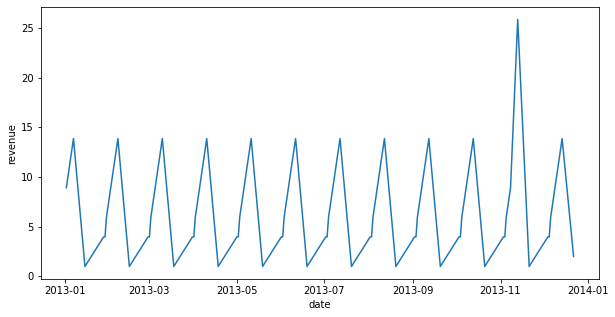

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='date', y='revenue', data=df[df.date >= '2013-01-01'])

## Dbeaver

O [DBeaver](https://dbeaver.io/) é um client SQL e uma ferramenta de administração e consulta de banco de dados relacionais.

Conectando com o dbeaver:

Database que vamos concetar: https://relational.fit.cvut.cz/dataset/Financial

Dados de conexão:
- hostname: relational.fit.cvut.cz
- database: financial
- port: 3306
- username: guest
- password: relational

## SQlite pros and cons
Prós
- Sem servidor, o que significa que é simples de iniciar e nenhuma configuração é necessária
- O sistema baseado em arquivos o torna muito portátil
- Ótimo para desenvolvimento e teste

Contras
- Não fornece acesso à rede (ou seja, acessando de outra máquina), pois não tem servidor
- Não foi desenvolvido para aplicações em grande escala
- Sem gerenciamento de usuário

Fonte: https://www.trustradius.com/products/sqlite/reviews?qs=pros-and-cons

## Alguns links de ajuda:
https://www.youtube.com/watch?v=xp_hi0_hprk&list=PL_c9BZzLwBRKC2PJwLFxc2y6cyXYYQzj3&index=4
https://www.youtube.com/watch?v=9Pzj7Aj25lw
https://www.youtube.com/watch?v=5bFxbwjN-Gk
https://www.sqlitetutorial.net/
https://www.sqlitetutorial.net/sqlite-sample-database/